In [1]:
import pandas as pd
import numpy as np


#VIZ
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [2]:
df = pd.read_csv("./Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

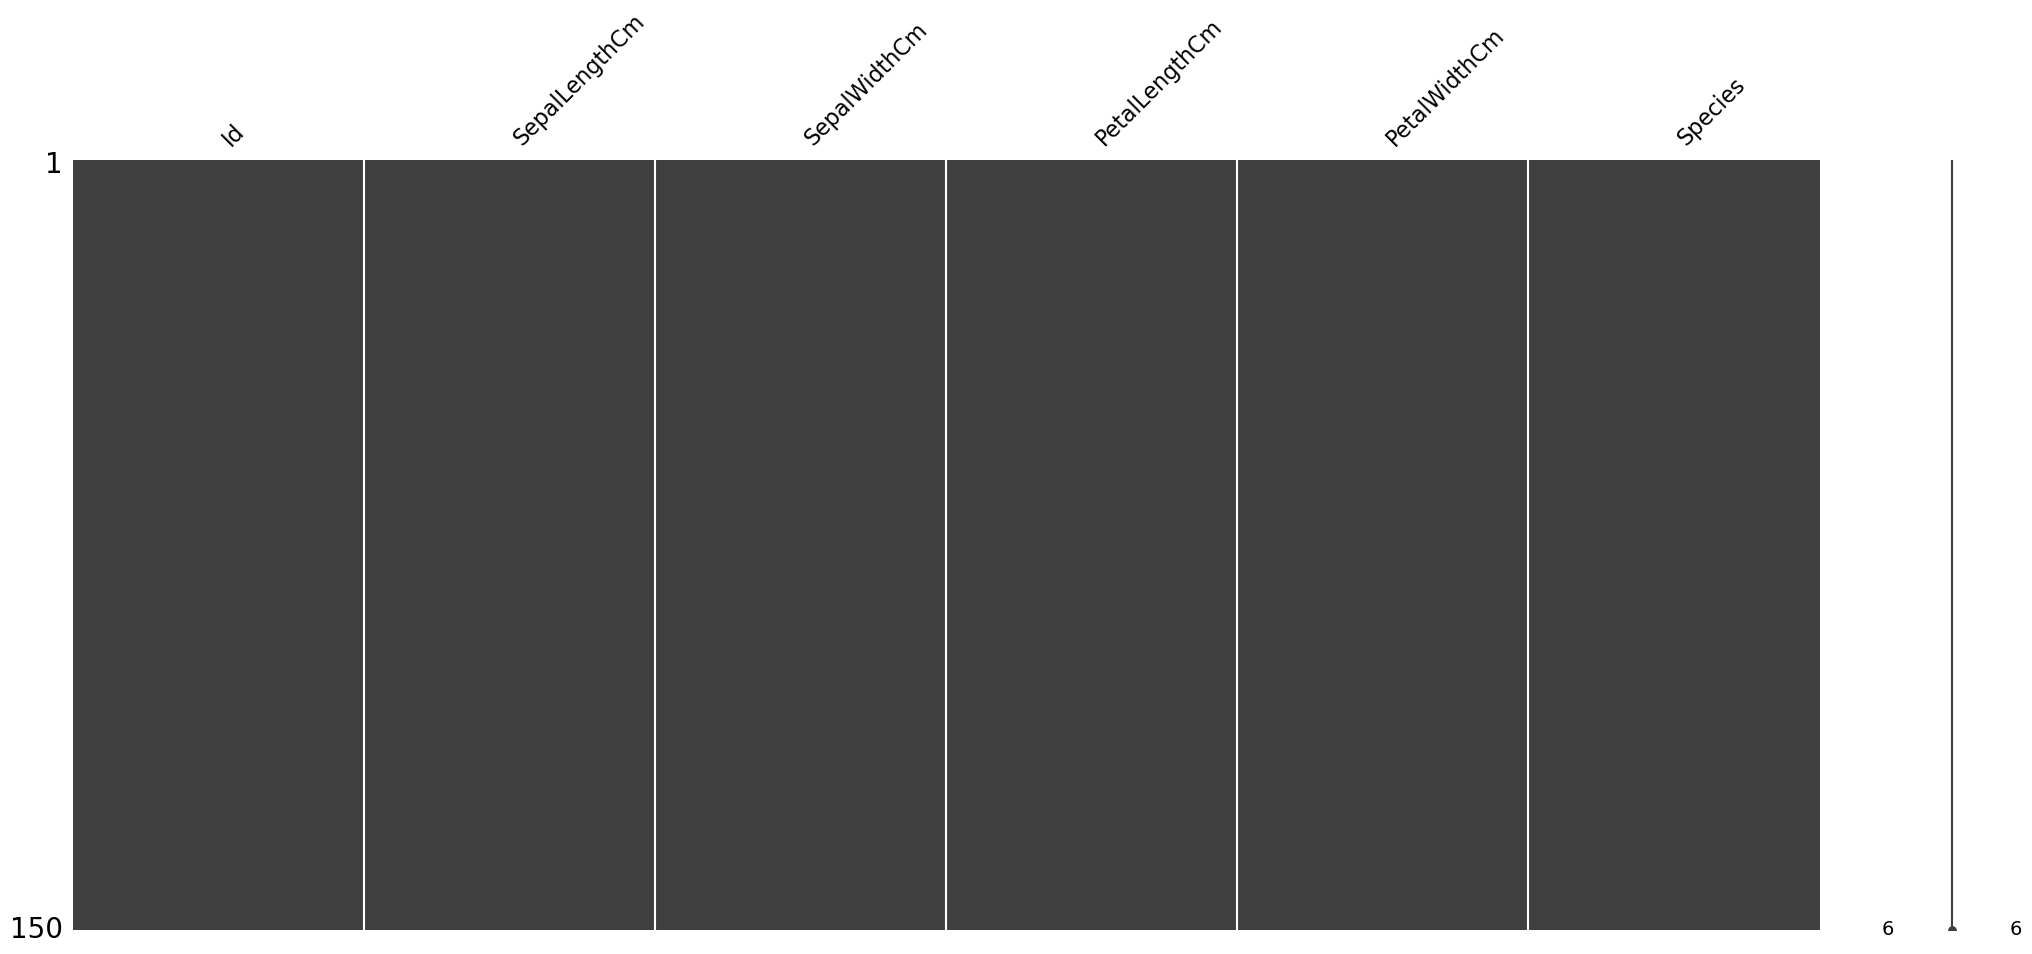

In [4]:
# Check for missing values

msn.matrix(df)

In [5]:
# Explore data

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# df[df['Species'] == 'Iris-setosa'].replace()
df['Species'].replace('Iris-versicolor', 'not-Iris-setosa', inplace=True)
df['Species'].replace('Iris-virginica', 'not-Iris-setosa', inplace=True)

/home/eedriz_/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


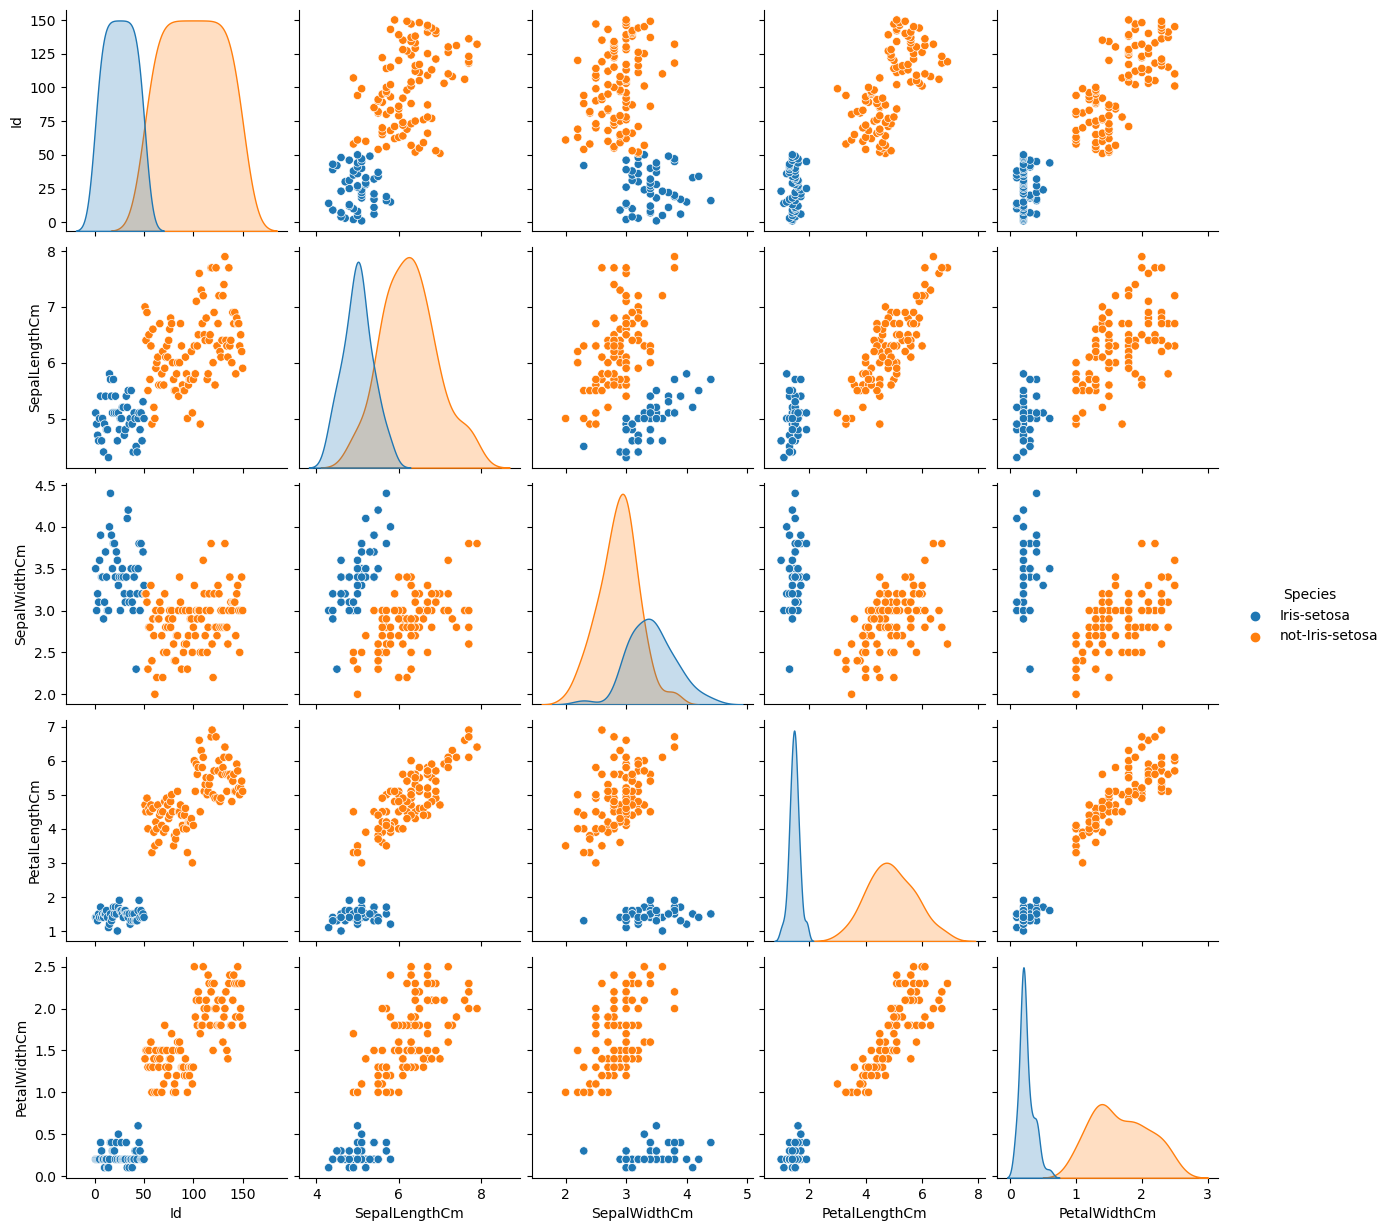

In [8]:
sns.pairplot(df, hue='Species')
plt.show()

 The properties of setosa are visibly different from non-setosa

In [9]:
# df['Is-setosa'] = df['Species']
# df['Is-setosa'] = 0
# df.loc[df['Species'] == 'Iris-setosa']
# # df.head()

df = pd.get_dummies(df, dtype='int64', drop_first=True)
df.rename(columns={'Species_not-Iris-setosa': 'Not_Iris_setosa'}, inplace=True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Not_Iris_setosa
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
# df.drop(columns=['Species_not-Iris-setosa'], inplace=True)
# df.head()

In [11]:
df.drop(columns=['Id'], inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Not_Iris_setosa
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


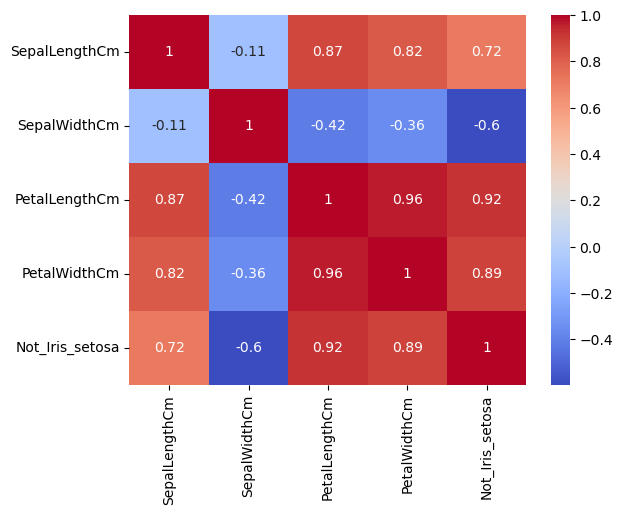

In [12]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
X = df.drop(columns=['Not_Iris_setosa']).to_numpy().reshape(-1, 4)
y = df['Not_Iris_setosa'].to_numpy().reshape(-1, 1)

print(f"shapes:\n x = {X.shape}\n y = {y.shape}")

shapes:
 x = (150, 4)
 y = (150, 1)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

/home/eedriz_/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix


In [20]:
# [TP, FP], [FN, TN]
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[11,  0],
       [ 0, 19]])

Looking at the confusion matrix, the model is expected to have a higher recall and precision. This is obvious as the confusion matrix shows no case of wrong prediction.

In [21]:
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

In [22]:
# Function to catculate Recall and Precision

def calc_recall(TP, FN):
    return TP/(TP + FN)

def calc_precision(TP, FP):
    return TP/(TP + FP)

In [23]:
print(f"Recall: {round(calc_recall(TP, FN), 4)*100}%")
print(f"Precision: {round(calc_precision(TP, FP), 4)*100}%")

Recall: 100.0%
Precision: 100.0%


In [24]:
F1_score = 2 * ((100.0*100.0)/(100.0+100.0))
print(f"F1 score: {F1_score}")

F1 score: 100.0


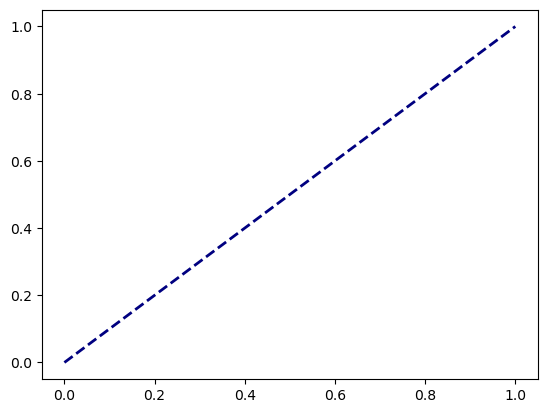

In [25]:
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# model.